In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

# Group resumes
* Create a model which attempts to group and score the resumes in these categories: testing, development and management.
* Output a table of the index of the resume and the three values for testing, development and management.

Preprocess data, create feature sets using data_cleaning.ipynb and data_preparation.ipynb first, which creates **result_data.pkl**

In [400]:
resume_data = pd.read_pickle("resume_data.pkl")
resume_data["feature_sent"] = resume_data["feature_set"].apply(lambda x: " ".join(x))

## Countvectorizer

In [393]:
cv = CountVectorizer(ngram_range=(1,4), min_df=5)
X = cv.fit_transform(resume_data["feature_sent"])
len(cv.get_feature_names_out())

267

## Topic modelling with LDA

In [443]:
len(cv.get_feature_names_out()), cv.get_feature_names_out()[:10]

(267,
 array(['ability', 'access', 'account', 'active', 'active directory',
        'ajax', 'analysis', 'analyst', 'analytical', 'android'],
       dtype=object))

In [ ]:
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda.fit(X)

In [ ]:
resume_data = resume_data.join(pd.DataFrame(lda.transform(X)))
resume_data['labels'] = resume_data.apply(lambda x: np.argmax([x[0], x[1], x[2]]), axis=1)

In [404]:
resume_data["labels"].value_counts()

2    102
1     63
0     55
Name: labels, dtype: int64

## Visualize clusters

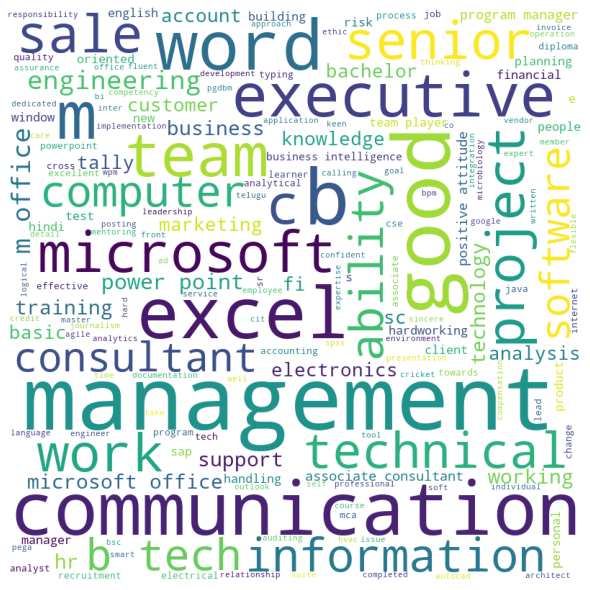

In [419]:
wordcloud0 = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(list(resume_data.loc[resume_data['labels']==0]['feature_sent'].values)))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud0)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
freqs0 = wordcloud0.words_

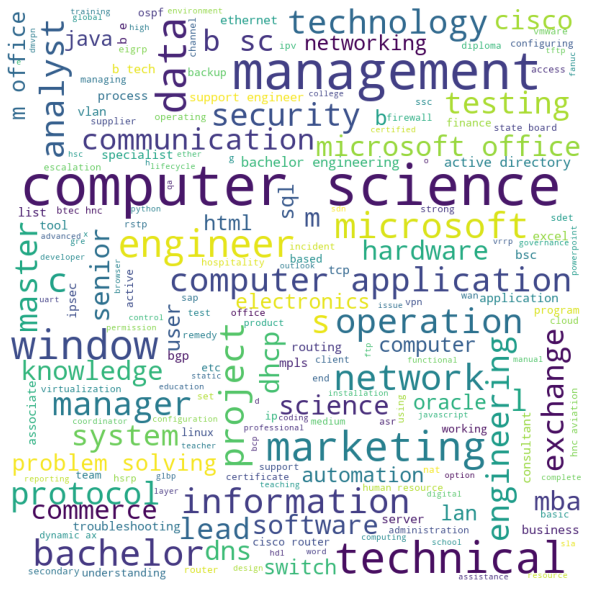

In [420]:
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(list(resume_data.loc[resume_data['labels']==1]['feature_sent'].values)))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
freqs1 = wordcloud1.words_

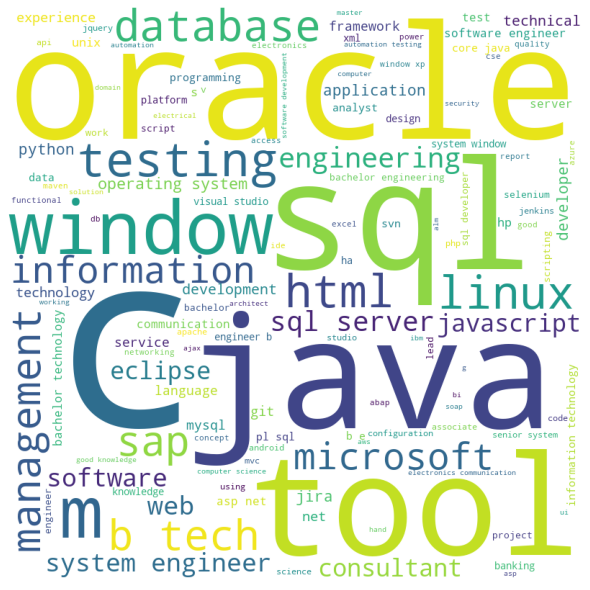

In [421]:
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(list(resume_data.loc[resume_data['labels']==2]['feature_sent'].values)))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
freqs2 = wordcloud2.words_

## identify label

In [428]:
def find_label(label):
    "find label based on wordcloud scores"
    if label not in freqs0:
        freqs0[label] = 0
    if label not in freqs1:
        freqs1[label] = 0
    if label not in freqs2:
        freqs2[label] = 0
    return np.argmax([freqs0[label], freqs1[label], freqs2[label]])

In [436]:
find_label("management"), find_label("testing"), find_label("computer science")

(0, 2, 1)

In [439]:
result = resume_data[[0, 1, 2]].rename(columns={find_label('management'): "management", find_label('testing'): "testing", find_label("computer science"): "development"})

In [441]:
result.to_csv("result.csv", index_label="resume_index")

## save models

In [446]:
import joblib
joblib.dump({'countvectorizer':cv, 'lda': lda}, "models.joblib")

## Run on holdout data

In [449]:
import joblib

In [450]:
models = joblib.load("models.joblib")
cv = models['countvectorizer']
lda = models['lda']

In [460]:
# create using data_cleaning.ipynb and data_preparation.ipynb
test_data = pd.DataFrame({'feature_sent':['testing oracle qa analysis', 'machine learning python ML engineer btech computer science']})

In [461]:
X = cv.transform(test_data['feature_sent'])

In [462]:
lda.transform(X)

array([[0.08682164, 0.06839273, 0.84478562],
       [0.05602874, 0.79919111, 0.14478015]])